## Predicting Left-Handedness from Psychological Factors
> Author: Matt Brems

One way to define the data science process is as follows:

1. Define the problem.
2. Obtain the data.
3. Explore the data.
4. Model the data.
5. Evaluate the model.
6. Answer the problem.

We'll walk through a full data science problem in this lab. 

---
## Define The Problem.

You're currently a data scientist working at a university. A professor of psychology is attempting to study the relationship between personalities and left-handedness. They have tasked you with gathering evidence so that they may publish.

As a data scientist, you know that any real data science problem must be **specific** and **conclusively answerable**. For example:
- Bad data science problem: "What is the link between obesity and blood pressure?"
    - This is vague and is not conclusively answerable. That is, two people might look at the conclusion and one may say "Sure, the problem has been answered!" and the other may say "The problem has not yet been answered."
- Good data science problem: "Does an association exist between obesity and blood pressure?"
    - This is more specific and is conclusively answerable. The problem specifically is asking for a "Yes" or "No" answer. Based on that, two independent people should both be able to say either "Yes, the problem has been answered" or "No, the problem has not yet been answered."
- Excellent data science problem: "As obesity increases, how does blood pressure change?"
    - This is very specific and is conclusively answerable. The problem specifically seeks to understand the effect of one variable on the other.

### In the context of the left-handedness and personality example, what are three specific and conclusively answerable problems that you could answer using data science? 

> You might find it helpful to check out the codebook in the repo for some inspiration.

__Answer__
1. Are certain personality traits more common in left-handed people?
Why? This question helps us identify is there any specific personality traits occures to those left-handed people 

2. As extroversion levels increase, how does the chance of being left-handed change?
Why? This question want to explores if higher extroversion (being more outgoing) affects the likelihood of left-handedness.

3. How does higher stress resilience impact the likelihood of being left-handed?
Why? This question focuses on how a person's ability to handle stress relates to their handedness

In [3]:
# This will be my problem
# As extroversion levels increase, how does the chance of being left-handed change?
# Q4 Q8 Q16 Q23 Q36 Q40 is  Extroversion-Related Questions

# Q4	I give people handmade gifts.
# Q8	I know the birthdays of my friends.
# Q16	When I was a child, I put on fake concerts and plays with my friends.
# Q23	I playfully insult my friends.
# Q36	I take lots of pictures of my activities.
# Q40	I really like dancing.

---
## Step 2: Obtain the data.

### Read in the file titled "data.csv":
> Hint: Despite being saved as a .csv file, you won't be able to simply `pd.read_csv()` this data!

In [5]:
# library imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression

In [6]:
#reading in the data. using 'sep' to organize and reads it.
data = pd.read_csv('data.csv', sep = '\t')

---

## Step 3: Explore the data.

### Conduct background research:

Domain knowledge is irreplaceable. Figuring out what information is relevant to a problem, or what data would be useful to gather, is a major part of any end-to-end data science project! For this lab, you'll be using a dataset that someone else has put together, rather than collecting the data yourself.

Do some background research about personality and handedness. What features, if any, are likely to help you make good predictions? How well do you think you'll be able to model this? Write a few bullet points summarizing what you believe, and remember to cite external sources.

You don't have to be exhaustive here. Do enough research to form an opinion, and then move on.

> You'll be using the answers to Q1-Q44 for modeling; you can disregard other features, e.g. country, age, internet browser.

In [8]:
# Summary of self research on internet

# Creativity & Openness: Left-handed may show higher creativity and openness.

# Social & Emotional Traits: Traits like introversion and emotional stability might differ slightly in left-handed people, 
# which could help in prediction.

# Stress Coping: Left-handed people may cope with stress differently.


### Conduct exploratory data analysis on this dataset:

If you haven't already, be sure to check out the codebook in the repo, as that will help in your EDA process.

You might use this section to perform data cleaning if you find it to be necessary.

In [10]:
data.shape

(4184, 56)

In [11]:
data.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,country,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
0,4,1,5,1,5,1,5,1,4,1,...,US,2,1,22,3,1,1,3,2,3
1,1,5,1,4,2,5,5,4,1,5,...,CA,2,1,14,1,2,2,6,1,1
2,1,2,1,1,5,4,3,2,1,4,...,NL,2,2,30,4,1,1,1,1,2
3,1,4,1,5,1,4,5,4,3,5,...,US,2,1,18,2,2,5,3,2,2
4,5,1,5,1,5,1,5,1,3,1,...,US,2,1,22,3,1,1,3,2,3


In [12]:
# Display data types and null counts together
print(data.dtypes.to_frame(name='Data Type').join(data.isna().sum().rename('Null Count')))

            Data Type  Null Count
Q1              int64           0
Q2              int64           0
Q3              int64           0
Q4              int64           0
Q5              int64           0
Q6              int64           0
Q7              int64           0
Q8              int64           0
Q9              int64           0
Q10             int64           0
Q11             int64           0
Q12             int64           0
Q13             int64           0
Q14             int64           0
Q15             int64           0
Q16             int64           0
Q17             int64           0
Q18             int64           0
Q19             int64           0
Q20             int64           0
Q21             int64           0
Q22             int64           0
Q23             int64           0
Q24             int64           0
Q25             int64           0
Q26             int64           0
Q27             int64           0
Q28             int64           0
Q29           

In [13]:
data.describe() #Check overview

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,testelapse,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
count,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,...,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000
mean,1.962715,3.829589,2.846558,3.186902,2.865440,3.672084,3.216539,3.184512,2.761233,3.522945,...,479.994503,1.576243,1.239962,30.370698,2.317878,1.654398,1.833413,5.013623,2.394359,1.190966
std,1.360291,1.551683,1.664804,1.476879,1.545798,1.342238,1.490733,1.387382,1.511805,1.242890,...,3142.178542,0.494212,0.440882,367.201726,0.874264,0.640915,1.303454,1.970996,2.184164,0.495357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.000000,1.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,1.000000,2.000000,1.000000,3.000000,2.000000,2.000000,1.000000,3.000000,...,186.000000,1.000000,1.000000,18.000000,2.000000,1.000000,1.000000,5.000000,1.000000,1.000000
50%,1.000000,5.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,...,242.000000,2.000000,1.000000,21.000000,2.000000,2.000000,1.000000,6.000000,2.000000,1.000000
75%,3.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,4.000000,5.000000,...,324.250000,2.000000,1.000000,27.000000,3.000000,2.000000,2.000000,6.000000,2.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,119834.000000,2.000000,2.000000,23763.000000,4.000000,3.000000,5.000000,7.000000,7.000000,3.000000


In [14]:
# Remove rows with outliers in 'age' and 'testelapse' columns
# Assuming 'age' over 100 is an error and 'testelapse' above a reasonable threshold (e.g., 5000 seconds)
data_cleaned = data[(data['age'] <= 100) & (data['testelapse'] <= 5000)]

# Display the shape of the cleaned dataset and verify if extreme values were removed
data_cleaned_shape = data_cleaned.shape
data_cleaned[['age', 'testelapse']].describe()

data_cleaned_shape, data_cleaned[['age', 'testelapse']].describe()


((4155, 56),
                age   testelapse
 count  4155.000000  4155.000000
 mean     24.586041   303.311673
 std      10.883747   295.481699
 min      13.000000     7.000000
 25%      18.000000   186.000000
 50%      21.000000   242.000000
 75%      27.000000   323.000000
 max      86.000000  4866.000000)

In [15]:
# Check 'hand' value counts 1=Right, 2=Left, 3=Both, 0 = No respond??
data['hand'].value_counts()

hand
1    3542
2     452
3     179
0      11
Name: count, dtype: int64

In [16]:
# Convert hand to binary > help identify hand in the models
# Mapping: Left-handed (2) = 1, Others (1,3) = 0
data['hand_binary'] = data['hand'].apply(lambda x: 1 if x == 2 else 0)  

In [126]:
correlation_values = data.drop('country', axis=1).corr()[['hand_binary']].sort_values(by='hand_binary', ascending=False)
correlation_values 

,hand_binary
hand_binary,1.000000
hand,0.568459
education,0.018778
Q26,0.015785
Q21,0.014627
Q25,0.011400
Q5,0.010870
Q31,0.009776
orientation,0.008446
Q38,0.002158


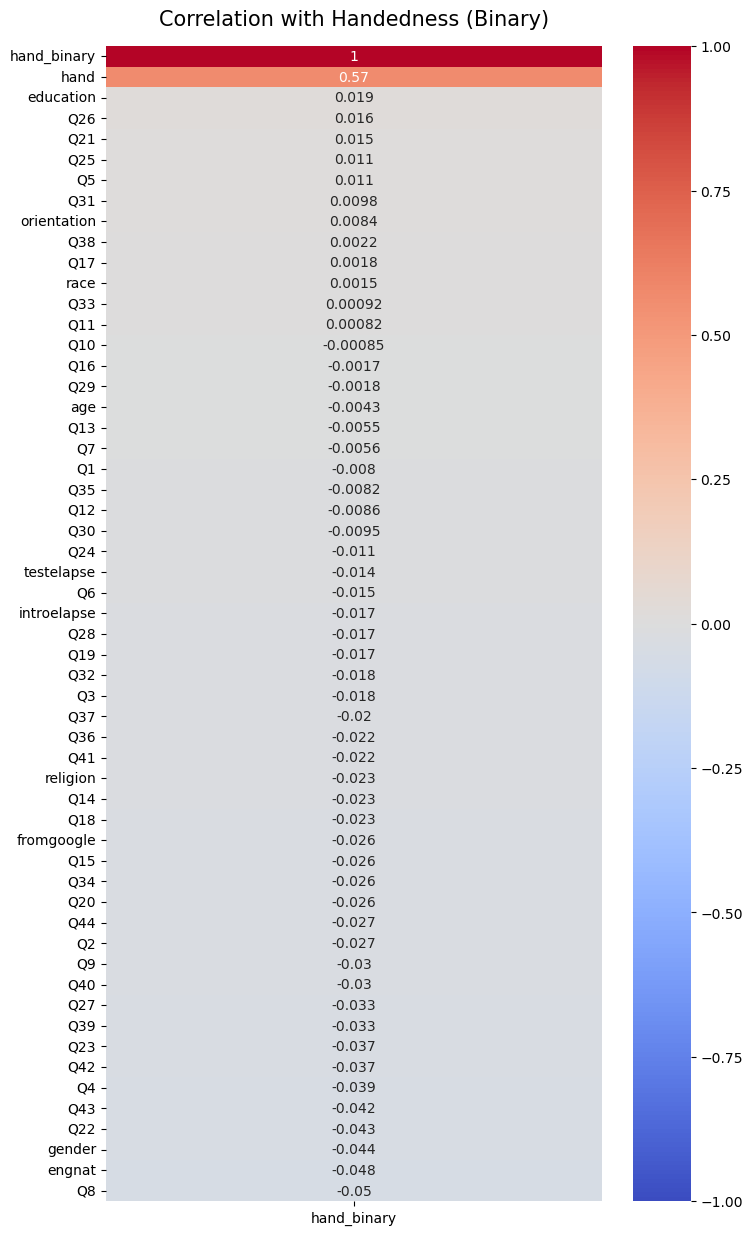

In [17]:
# Find Correlation
plt.figure(figsize=(8, 15))

# Create the heatmap for correlation with 'hand_binary', sorted by correlation values
heatmap = sns.heatmap(
    data.drop('country', axis=1).corr()[['hand_binary']].sort_values(by='hand_binary', ascending=False),
    vmin=-1, vmax=1, annot=True, cmap='coolwarm'
)

# Set the title for the heatmap
heatmap.set_title('Correlation with Handedness (Binary)', fontdict={'fontsize': 15}, pad=15)

# Show the heatmap
plt.show()

In [18]:
# Check the value of responses from English speakers 
data['engnat'].value_counts()

engnat
1    3130
2    1029
0      25
Name: count, dtype: int64

In [19]:
# Check contries value counts 1=Yes, 2=No
data['country'].unique()

array(['US', 'CA', 'NL', 'GR', 'GB', 'KR', 'SE', 'NO', 'DE', 'NZ', 'CH',
       'RO', 'IL', 'IN', 'ZA', 'TR', 'JM', 'AU', 'BE', 'PL', 'CZ', 'RS',
       'TW', 'A2', 'MX', 'PH', 'ES', 'AT', 'JP', 'IT', 'SG', 'MY', 'HK',
       'FR', 'EU', 'DK', 'AE', 'EC', 'TH', 'IE', 'PK', 'BR', 'ID', 'EG',
       'NI', 'FI', 'CN', 'RU', 'SI', 'AR', 'PT', 'LB', 'DO', 'PF', 'LT',
       'BG', 'GE', 'CL', 'SK', 'EE', 'KE', 'UZ', 'LV', 'BB', 'BN', 'PR',
       'HR', 'NP', 'A1', 'PE', 'UA', 'HU', 'VN', 'TZ', 'KH', 'UY', 'VE',
       'IS', 'MP', 'CO', 'JO', 'TN', 'KW', 'CY', 'FJ', 'LK', 'VI', 'ZW',
       'IM', 'ZM', 'QA', 'DZ', 'LY', 'SA'], dtype=object)

### Calculate and interpret the baseline accuracy rate:

In [145]:
data['hand'].value_counts(normalize=True).mul(100)

hand
1    84.655832
2    10.803059
3     4.278203
0     0.262906
Name: proportion, dtype: float64

In [22]:
# Interpret

# Right-handed (Category 1): Represents 84.66% 
# Left-handed (Category 2): Represents 10.80% 
# Both-handed (Category 3): Represents 4.28% 

# Baseline Accuracy
# Since Right-handed individuals make up the majority with 84.66%, the baseline accuracy would be 84.66%. 
# The ideal predictive model should get an accurate above 84.66% 

### Short answer questions:

In this lab, you'll use K-nearest neighbors and logistic regression to model handedness based on psychological factors. 

Answer the following related questions; your answers may be in bullet points.

#### Describe the difference between regression and classification problems:

In [24]:
# Answer here:

# The key difference between Classification vs Regression algorithms is...

# Regression  are used to predicts continuous values (e.g., prices) and 
# Classification algorithms are used to predict or classify the discrete categories (e.g., handeness)

# Regression aims to minimise the prediction error (e.g.,MSE) while,
# Classification aims to maximize the accuracy in predicting class label.


#### Considering $k$-nearest neighbors, describe the relationship between $k$ and the bias-variance tradeoff:

In [26]:
# Answer here:

# Bias is the error occurs when model prediction pays little attention to the training data 
# and perform too simple which doesn't fit the data well (underfitting)

# Variance is the error occurs when the model is too sensitive to small changes in the training data which captures too much noise (overfitting).

# The bias-variance tradeoff is about finding the sweet spot. 
# If bias is too high, the model may not capture important patterns in the data (underfitting). 
# If variance is too high, the model may perform well on training data but poorly on new data (overfitting).

# In KNN, K determines the model's complexity. 

# A small K leads to low bias because the model is very flexible to the training data. 
# But this can result in overfitting as capturing too much noise and perform poorly on new unseen data.

# Increses K in the model can help the model become less sensitive and make model more complex.
# But this cal lead too higher bias (underfitting) and the model may miss important patterns.

# By splitting the data into training and validation sets, can help by doing experiment with different values of K and find the optimal one.

#### Why do we often standardize predictor variables when using $k$-nearest neighbors?

In [28]:
# Answer here:

# Distance Measurement: 
# KNN finds neighbors by measuring distances. If features are on different scales, it can mess up these calculations. 
# Standardizing makes sure all features have the same importance.

# Equal Contribution: 
# Standardization brings all features to a similar size, so no single feature can unfairly influence the results.

# Improved Performance: 
# When features are standardized, KNN can choose neighbors more accurately, which helps the model perform better on new data.

# Easier Understanding:
# Standardization makes it easier to find true similarities between data points, leading to better classifications and predictions.

#### Do you think we should standardize the explanatory variables for this problem? Why or why not?

In [30]:
# Answer here:

# Yes

# Distance Measurements: 
# When explore the variables (like personality traits, scores, or other psychological factors) 
# are on different scales can lead to inaccurate distance calculation. Standardizing ensures that the distances are correct.

# Equal Contribution: 
# By standardizing the variables, each psychological factor is treated equally in the analysis. 
# This means that every factor will be treated fairly.

# Improved Performance: 
# KNN can make more accurate predictions about who is left-handed based on the psychological factors in the data. 
# It helps the algorithm correctly identify similar cases.

# Easier Understanding: Standardized features can make it simpler to interpret the result, 
# especially when looking at how different psychological factors relate to left-handedness.

#### How do we settle on $k$ for a $k$-nearest neighbors model?

In [32]:
# Answer here:
# cross-validation tactics can help to choose the optimal k for the dataset.

#### What is the default type of regularization for logistic regression as implemented in scikit-learn? (You might [check the documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).)

In [34]:
# Answer here:

#penalty : {'l1', 'l2', 'elasticnet', None}, default='l2'
    #Specify the norm of the penalty:

    #- `None`: no penalty is added;
    #- `'l2'`: add a L2 penalty term and it is the default choice;
    #- `'l1'`: add a L1 penalty term;
    #- `'elasticnet'`: both L1 and L2 penalty terms are added.

#### Describe the relationship between the scikit-learn `LogisticRegression` argument `C` and regularization strength:

In [36]:
# Answer here:

# The C parameter controls how much regularization is applied.

# High C : Means less regularization, the model fits the training data too close, too complex. May lead to overfitting.
# Low C : Means more regularization, when the model perform too simple and not capture all the important patterns. May lead to underfitting.

#### Describe the relationship between regularization strength and the bias-variance tradeoff:

In [38]:
# Answer here:

# Strong Regularization:
# Increases Bias: Simplifies the model, risking underfitting.
# Decreases Variance: Makes the model less sensitive to training data noise.
    
# Weak Regularization:
# Decreases Bias: Makes the model more complex, capturing more patterns.
# Increases Variance: Risks overfitting by being too sensitive to training data.


#### Logistic regression is considered more interpretable than $k$-nearest neighbors. Explain why.

In [40]:
# Answer here:

# Logistic regression able to provide each feature a coefficient.
# This can help us to understand how much each feature influence the prediction. 

# Interpret the coefficient
# A positive coefficient means that higher values of that feature increase the likelihood of the positive class.
# A negative coefficient means that higher values of that feature decrease the likelihood of the positive class.

---

## Step 4 & 5 Modeling: $k$-nearest neighbors

### Train-test split your data:

Your features should be:

In [42]:
# As extroversion levels increase, how does the chance of being left-handed change?
# Q1 Q2 Q4 Q8 Q16 Q23 Q36 Q40 Q44 are  Extroversion-Related Questions

In [128]:
# Calculate the extroversion score as the mean of the specified questions
extroversion_questions = ['Q1', 'Q2', 'Q4', 'Q8', 'Q16', 'Q22', 'Q23', 'Q36', 'Q40', 'Q44']
data['extroversion_score'] = data[extroversion_questions].sum(axis=1) / 45  # Normalize by maximum possible score of 30 (5*6)

In [217]:
from sklearn.model_selection import train_test_split
# Split the data
X = data[['extroversion_score']]
y = data['hand_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [219]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3347, 1)
(837, 1)
(3347,)
(837,)


#### Create and fit four separate $k$-nearest neighbors models: 
- one with $k = 3$
- one with $k = 5$
- one with $k = 15$
- one with $k = 25$:

In [221]:
# Standardize the feature
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [270]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Loop over each k value
for k in [3, 5, 15, 25]:
    
    # Initialize the KNN classifier with the current k value
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model to the training data
    knn.fit(X_train_scaled, y_train)
    
    # Make predictions on the training data
    y_train_pred = knn.predict(X_train_scaled)
    # Calculate training accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    
    # Make predictions on the test data
    y_test_pred = knn.predict(X_test_scaled)
    # Calculate test accuracy
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Perform cross-validation
    cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)  # 5-fold cross-validation
    cv_accuracy = np.mean(cv_scores)  # Average cross-validation accuracy

    # Output
    print(f"\nKNN Model with k={k}")
    print("Training Accuracy:", train_accuracy)
    print("Testing Accuracy:", test_accuracy)
    print("Cross-Validation Accuracy:", cv_accuracy)


KNN Model with k=3
Training Accuracy: 0.8954287421571556
Testing Accuracy: 0.8781362007168458
Cross-Validation Accuracy: 0.8655556299221381

KNN Model with k=5
Training Accuracy: 0.8951299671347476
Testing Accuracy: 0.8781362007168458
Cross-Validation Accuracy: 0.8846757245164312

KNN Model with k=15
Training Accuracy: 0.8948311921123394
Testing Accuracy: 0.8805256869772998
Cross-Validation Accuracy: 0.8948316712402115

KNN Model with k=25
Training Accuracy: 0.8948311921123394
Testing Accuracy: 0.8805256869772998
Cross-Validation Accuracy: 0.8948316712402115


### Evaluate your models:

Evaluate each of your four models on the training and testing sets, and interpret the four scores. 

Are any of your models overfit or underfit? 

Do any of your models beat the baseline accuracy rate?

In [265]:
k_values = [3, 5, 15, 25]  # k value
k_scores = []

# Perform cross-validation for each specified k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)
    k_scores.append(scores.mean())
    
# Identify the optimal k
optimal_k = k_values[np.argmax(k_scores)]
print(optimal_k)

15


In [ ]:
# No models is underfitting or overfitting
# Beating Baseline: All models outperform the baseline accuracy of 84.66%, which is a positive outcome for the KNN analysis.
# However, the result shows k=15 is the most optimal k

---

## Step 4 & 5 Modeling: logistic regression

#### Create and fit four separate logistic regression models: one with LASSO and $\alpha = 1$, one with LASSO and $\alpha = 10$, one with Ridge and $\alpha = 1$, and one with Ridge and $\alpha = 10$. *(Hint: Be careful with how you specify $\alpha$ in your model!)*

Note: You can use the same train and test data as used above with kNN.

In [251]:
# Instantiate models 
# LASSO (L1) 
lasso_alpha1 = LogisticRegression(penalty='l1', C=1.0, solver='liblinear')  # alpha=1 > C=1.0
lasso_alpha10 = LogisticRegression(penalty='l1', C=0.1, solver='liblinear')  # alpha=10 > C=0.1

# solver = 'liblinear' to revent errors with the L1 penalty.
#    - For small datasets, 'liblinear' is a good choice.
        
# Ridge (L2)
ridge_alpha1 = LogisticRegression(penalty='l2', C=1.0)  
ridge_alpha10 = LogisticRegression(penalty='l2', C=0.1) 

# Fit models
lasso_alpha1.fit(X_train_scaled, y_train)
lasso_alpha10.fit(X_train_scaled, y_train)
ridge_alpha1.fit(X_train_scaled, y_train)
ridge_alpha10.fit(X_train_scaled, y_train)

# Print coefficients and intercepts
print("LASSO Regularization (alpha=1)")
print(f'Log Reg Coefficient: {lasso_alpha1.coef_}')
print(f'Log Reg Intercept: {lasso_alpha1.intercept_}\n')

print("LASSO Regularization (alpha=10)")
print(f'Log Reg Coefficient: {lasso_alpha10.coef_}')
print(f'Log Reg Intercept: {lasso_alpha10.intercept_}\n')

print('===================================\n')

print("Ridge Regularization (alpha=1)")
print(f'Log Reg Coefficient: {ridge_alpha1.coef_}')
print(f'Log Reg Intercept: {ridge_alpha1.intercept_}\n')

print("Ridge Regularization (alpha=10)")
print(f'Log Reg Coefficient: {ridge_alpha10.coef_}')
print(f'Log Reg Intercept: {ridge_alpha10.intercept_}\n')

LASSO Regularization (alpha=1)
Log Reg Coefficient: [[-0.15497364]]
Log Reg Intercept: [-2.14741457]

LASSO Regularization (alpha=10)
Log Reg Coefficient: [[-0.12423319]]
Log Reg Intercept: [-2.11578126]


Ridge Regularization (alpha=1)
Log Reg Coefficient: [[-0.1579778]]
Log Reg Intercept: [-2.1509531]

Ridge Regularization (alpha=10)
Log Reg Coefficient: [[-0.15368177]]
Log Reg Intercept: [-2.15042448]



### Evaluate your models:

Evaluate each of your four models on the training and testing sets, and interpret the four scores. 

Are any of your models overfit or underfit? 

Do any of your models beat the baseline accuracy rate?

In [261]:
# Calculate training and testing accuracy for each model
models = {
    "LASSO (alpha=1)": lasso_alpha1,
    "LASSO (alpha=10)": lasso_alpha10,
    "Ridge (alpha=1)": ridge_alpha1,
    "Ridge (alpha=10)": ridge_alpha10
}

for name, model in models.items():
    train_accuracy = accuracy_score(y_train, model.predict(X_train_scaled))
    test_accuracy = accuracy_score(y_test, model.predict(X_test_scaled))
    
    print(f"{name}")
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Testing Accuracy: {test_accuracy:.4f}")
    print("=========================")

LASSO (alpha=1)
Training Accuracy: 0.8948
Testing Accuracy: 0.8805
LASSO (alpha=10)
Training Accuracy: 0.8948
Testing Accuracy: 0.8805
Ridge (alpha=1)
Training Accuracy: 0.8948
Testing Accuracy: 0.8805
Ridge (alpha=10)
Training Accuracy: 0.8948
Testing Accuracy: 0.8805


In [ ]:
# Interpret
# No Overfitting or Underfitting:
# Almost the similar accuracy score indicate it is a good generalization.

# The regression is better than Baseline as all models can achive over the baseline accuracy of 84.66%.

---

## Step 6: Answer the problem.

Are any of your models worth moving forward with? 

What are the "best" models?

In [ ]:
# I would pick Logistic Regression (LASSO or Ridge, alpha=1 or 10).
# Since the model have consistency performance and not much different between train accuracy score and test accuracy score.

# KNN  with k = 15 and 25 have good training and test accuracy score too. 
# BUT I should Logistic Regression as it offer the precise balance performance and interpretability.
